In [1]:
import joblib
import pandas
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier

E:\ancaconda2\envs\pytorch5\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [60]:
X_test = pandas.read_csv("datasets/test_public.csv")
X_train = pandas.read_csv("datasets/train_public.csv")
X_inter = pandas.read_csv("datasets/train_internet.csv")
X_train.describe()


,loan_id,user_id,total_loan,year_of_loan,interest,monthly_payment,house_exist,censor_status,use,post_code,...,policy_code,f0,f1,f2,f3,f4,early_return,early_return_amount,early_return_amount_3mon,isDefault
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.0,9502.000000,9142.000000,9502.000000,9502.000000,9502.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.025210e+06,225209.587700,14402.126591,3.479600,13.222782,436.960427,0.612200,1.014600,1.762600,257.519100,...,1.0,5.690486,0.001422,8.467796,14.659019,8.098085,1.290600,2173.916100,335.232240,0.168300
std,1.438682e+04,14386.820956,8953.946807,0.853965,4.875755,261.754396,0.672203,0.787686,2.392031,201.351778,...,0.0,3.298546,0.037685,7.315953,8.263954,4.871797,1.449469,3027.539977,635.108825,0.374151
min,1.000008e+06,200008.000000,818.181818,3.000000,4.779000,30.440000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.012973e+06,212973.250000,7500.000000,3.000000,9.702000,248.820000,0.000000,0.000000,0.000000,99.000000,...,1.0,3.000000,0.000000,4.000000,9.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,1.025276e+06,225276.500000,12272.727270,3.000000,12.639000,371.525000,1.000000,1.000000,0.000000,197.000000,...,1.0,5.000000,0.000000,7.000000,13.000000,7.000000,1.000000,838.500000,0.000000,0.000000
75%,1.037694e+06,237694.500000,19636.363640,3.000000,15.985500,573.830000,1.000000,2.000000,4.000000,390.000000,...,1.0,7.000000,0.000000,11.000000,19.000000,11.000000,3.000000,3354.250000,413.675000,0.000000
max,1.049997e+06,249997.000000,47272.727270,5.000000,33.979000,1503.890000,4.000000,2.000000,13.000000,901.000000,...,1.0,33.000000,1.000000,93.000000,88.000000,50.000000,5.000000,18413.000000,5523.900000,1.000000


In [22]:
X_inter.shape
X_train.shape

(10000, 39)

In [6]:
X_test.describe()

,loan_id,user_id,total_loan,year_of_loan,interest,monthly_payment,house_exist,censor_status,use,post_code,...,title,policy_code,f0,f1,f2,f3,f4,early_return,early_return_amount,early_return_amount_3mon
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.0,4741.000000,4546.000000,4741.000000,4741.000000,4741.000000,5000.000000,5000.000000,5000.000000
mean,1.024992e+06,224991.897800,14257.687727,3.492400,13.207284,430.961668,0.616400,0.998000,1.803200,262.266000,...,1822.506600,1.0,5.650918,0.000880,8.589538,14.703649,8.132040,1.570000,2195.747800,338.945112
std,1.443135e+04,14431.348968,8755.784815,0.861679,4.795365,251.272924,0.671819,0.781613,2.413801,201.484039,...,7971.472766,0.0,3.338728,0.029653,7.425200,8.123397,4.795245,1.456957,2995.760578,623.447110
min,1.000006e+06,200006.000000,818.181818,3.000000,4.788000,30.530000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,1.012724e+06,212723.500000,7636.363636,3.000000,9.675000,250.290000,0.000000,0.000000,0.000000,103.000000,...,0.000000,1.0,3.000000,0.000000,3.000000,9.000000,5.000000,0.000000,0.000000,0.000000
50%,1.024658e+06,224658.500000,12272.727270,3.000000,12.690000,375.430000,1.000000,1.000000,0.000000,214.000000,...,2.000000,1.0,5.000000,0.000000,7.000000,13.000000,7.000000,1.000000,890.000000,0.000000
75%,1.037519e+06,237518.750000,19200.000000,3.000000,15.990000,564.562500,1.000000,2.000000,4.000000,401.000000,...,5.000000,1.0,7.000000,0.000000,11.000000,19.000000,10.000000,3.000000,3426.000000,426.461539
max,1.049998e+06,249998.000000,47272.727270,5.000000,34.089000,1486.340000,5.000000,2.000000,13.000000,936.000000,...,61330.000000,1.0,28.000000,1.000000,60.000000,62.000000,38.000000,5.000000,19710.000000,5968.846154


In [8]:
((X_train.isnull().sum())/X_train.shape[0]).sort_values(ascending=False).map(lambda x:"{:.2%}".format(x))

f1                          8.58%
work_year                   6.22%
f0                          4.98%
f4                          4.98%
f3                          4.98%
f2                          4.98%
pub_dero_bankrup            0.07%
earlies_credit_mon          0.00%
recircle_b                  0.00%
recircle_u                  0.00%
initial_list_status         0.00%
app_type                    0.00%
loan_id                     0.00%
title                       0.00%
policy_code                 0.00%
known_outstanding_loan      0.00%
early_return                0.00%
early_return_amount         0.00%
early_return_amount_3mon    0.00%
known_dero                  0.00%
scoring_high                0.00%
user_id                     0.00%
scoring_low                 0.00%
total_loan                  0.00%
year_of_loan                0.00%
interest                    0.00%
monthly_payment             0.00%
class                       0.00%
employer_type               0.00%
industry      

In [24]:
X_train.isnull().any()

loan_id                     False
user_id                     False
total_loan                  False
year_of_loan                False
interest                    False
monthly_payment             False
class                       False
employer_type               False
industry                    False
work_year                    True
house_exist                 False
censor_status               False
issue_date                  False
use                         False
post_code                   False
region                      False
debt_loan_ratio             False
del_in_18month              False
scoring_low                 False
scoring_high                False
known_outstanding_loan      False
known_dero                  False
pub_dero_bankrup             True
recircle_b                  False
recircle_u                  False
initial_list_status         False
app_type                    False
earlies_credit_mon          False
title                       False
policy_code   

In [12]:
X_train.work_year.unique()

array(['3 years', '10+ years', '6 years', '< 1 year', '2 years', nan,
       '4 years', '1 year', '8 years', '5 years', '9 years', '7 years'],
      dtype=object)

In [14]:
X_train.columns.difference(X_inter)

Index(['app_type', 'censor_status', 'class', 'debt_loan_ratio',
       'del_in_18month', 'earlies_credit_mon', 'early_return',
       'early_return_amount', 'early_return_amount_3mon', 'employer_type',
       'f0', 'f1', 'f2', 'f3', 'f4', 'house_exist', 'industry',
       'initial_list_status', 'interest', 'isDefault', 'issue_date',
       'known_dero', 'known_outstanding_loan', 'loan_id', 'monthly_payment',
       'policy_code', 'post_code', 'pub_dero_bankrup', 'recircle_b',
       'recircle_u', 'region', 'scoring_high', 'scoring_low', 'title',
       'total_loan', 'use', 'user_id', 'work_year', 'year_of_loan'],
      dtype='object')

In [15]:
X_inter.columns.difference(X_train)

Index(['censor_status', 'class', 'debt_loan_ratio', 'del_in_18month',
       'earlies_credit_mon', 'early_return', 'early_return_amount',
       'early_return_amount_3mon', 'employer_type', 'f0', 'f1', 'f2', 'f3',
       'f4', 'f5', 'house_exist', 'house_loan_status', 'industry',
       'initial_list_status', 'interest', 'isDefault', 'issue_date', 'loan_id',
       'marriage', 'monthly_payment', 'offsprings', 'policy_code', 'post_code',
       'pub_dero_bankrup', 'recircle_b', 'recircle_u', 'region',
       'scoring_high', 'scoring_low', 'sub_class', 'title', 'total_loan',
       'use', 'user_id', 'work_type', 'work_year', 'year_of_loan'],
      dtype='object')

In [20]:
set(X_train.columns)-(set(X_inter.columns.tolist()))

{'app_type', 'known_dero', 'known_outstanding_loan'}

In [21]:
set(X_inter.columns)-(set(X_train.columns.tolist()))

{'f5', 'house_loan_status', 'marriage', 'offsprings', 'sub_class', 'work_type'}

Index(['loan_id', 'user_id', 'total_loan', 'year_of_loan', 'interest',
       'monthly_payment', 'class', 'employer_type', 'industry', 'work_year',
       'house_exist', 'censor_status', 'issue_date', 'use', 'post_code',
       'region', 'debt_loan_ratio', 'del_in_18month', 'scoring_low',
       'scoring_high', 'known_outstanding_loan', 'known_dero',
       'pub_dero_bankrup', 'recircle_b', 'recircle_u', 'initial_list_status',
       'app_type', 'earlies_credit_mon', 'title', 'policy_code', 'f0', 'f1',
       'f2', 'f3', 'f4', 'early_return', 'early_return_amount',
       'early_return_amount_3mon', 'isDefault'],
      dtype='object')

In [27]:
X_train.columns

Index(['loan_id', 'user_id', 'total_loan', 'year_of_loan', 'interest',
       'monthly_payment', 'class', 'employer_type', 'industry', 'work_year',
       'house_exist', 'censor_status', 'issue_date', 'use', 'post_code',
       'region', 'debt_loan_ratio', 'del_in_18month', 'scoring_low',
       'scoring_high', 'known_outstanding_loan', 'known_dero',
       'pub_dero_bankrup', 'recircle_b', 'recircle_u', 'initial_list_status',
       'app_type', 'earlies_credit_mon', 'title', 'policy_code', 'f0', 'f1',
       'f2', 'f3', 'f4', 'early_return', 'early_return_amount',
       'early_return_amount_3mon', 'isDefault'],
      dtype='object')

E:\ancaconda2\envs\pytorch5\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


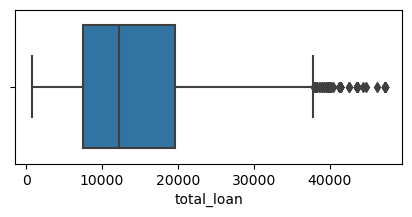

In [63]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(5,2))
sns.boxplot(X_train["total_loan"])
plt.show()

In [39]:
# 计算下四分位数和上四分位
Q1 = X_train["debt_loan_ratio"].quantile(q = 0.25)
Q3 = X_train["debt_loan_ratio"].quantile(q = 0.75)

# 基于1.5倍的四分位差计算上下须对应的值
low_whisker = Q1 - 1.5*(Q3 - Q1)
up_whisker = Q3 + 1.5*(Q3 - Q1)
print(up_whisker)

40.21704545750001


In [47]:
X_train.drop(X_train[X_train["total_loan"] > 3800].index,inplace=True)
X_train.drop(X_train[X_train["total_loan"] >3800].index,inplace=True)

In [48]:
X_train.describe()

,loan_id,user_id,total_loan,year_of_loan,interest,monthly_payment,house_exist,censor_status,use,post_code,...,policy_code,f0,f1,f2,f3,f4,early_return,early_return_amount,early_return_amount_3mon,isDefault
count,4.000000e+00,4.000000,4.000000,4.0,4.000000,4.000000,4.00,4.00000,4.000000,4.000000,...,4.0,4.000000,3.0,4.000000,4.000000,4.000000,4.00,4.000000,4.0,4.00
mean,1.027398e+06,227397.750000,3125.000000,3.0,18.638000,114.902500,0.25,1.50000,4.000000,351.750000,...,1.0,8.750000,0.0,6.250000,18.000000,6.000000,1.25,336.000000,0.0,0.25
std,2.080986e+04,20809.864878,629.152869,0.0,1.832069,32.106097,0.50,0.57735,1.414214,253.597286,...,0.0,7.088723,0.0,3.774917,18.672618,2.160247,1.50,527.105935,0.0,0.50
min,1.006031e+06,206031.000000,2363.636364,3.0,16.605000,72.760000,0.00,1.00000,2.000000,115.000000,...,1.0,4.000000,0.0,2.000000,8.000000,4.000000,0.00,0.000000,0.0,0.00
25%,1.011912e+06,211911.750000,2738.636364,3.0,17.334000,101.275000,0.00,1.00000,3.500000,201.250000,...,1.0,4.000000,0.0,4.250000,8.750000,4.750000,0.00,0.000000,0.0,0.00
50%,1.026835e+06,226835.000000,3204.545455,3.0,18.826000,119.055000,0.00,1.50000,4.500000,295.500000,...,1.0,6.000000,0.0,6.000000,9.000000,5.500000,1.00,117.500000,0.0,0.00
75%,1.042321e+06,242321.000000,3590.909091,3.0,20.130000,132.682500,0.25,2.00000,5.000000,446.000000,...,1.0,10.750000,0.0,8.000000,18.250000,6.750000,2.25,453.500000,0.0,0.25
max,1.049890e+06,249890.000000,3727.272727,3.0,20.295000,148.740000,1.00,2.00000,5.000000,701.000000,...,1.0,19.000000,0.0,11.000000,46.000000,9.000000,3.00,1109.000000,0.0,1.00
